In [1]:
import scipy
import csv
import pandas as p
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set(style="white")

In [4]:
data = p.read_csv('Mall_Customers.csv', delimiter=',')

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
i = 0
for sp in data['Spending Score (1-100)']:
    data.iloc[i,4] = data.iloc[i,3]*sp/100
    i = i+1

In [7]:
data['Gender'].value_counts()   #Gives us the Class Distibution of the DataSet

Female    112
Male       88
Name: Gender, dtype: int64

In [8]:
#Basic Statistics for Various Columns
genm = data[data['Gender'] == 'Male']['Age']
genm.describe()

count    88.000000
mean     39.806818
std      15.514812
min      18.000000
25%      27.750000
50%      37.000000
75%      50.500000
max      70.000000
Name: Age, dtype: float64

In [9]:
#Basic Statistics for Various Columns
genf = data[data['Gender'] == 'Female']['Age']
genf.describe()

count    112.000000
mean      38.098214
std       12.644095
min       18.000000
25%       29.000000
50%       35.000000
75%       47.500000
max       68.000000
Name: Age, dtype: float64

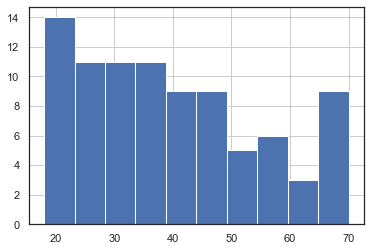

In [10]:
bi_genm = data[data['Gender'] == 'Male']
bi_genm['Age'].hist()

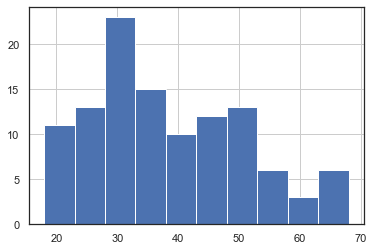

In [11]:
bi_genf = data[data['Gender'] == 'Female']
bi_genf['Age'].hist()

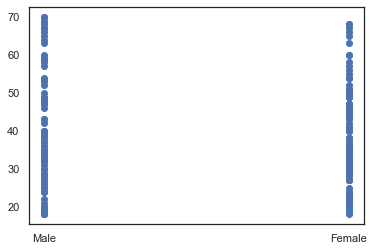

In [12]:
#Scatterplot
plt.scatter(data['Gender'],data['Age'])

In [13]:
genm_income = data[data['Gender'] == 'Male']['Annual Income (k$)']
genm_income.describe()

count     88.000000
mean      62.227273
std       26.638373
min       15.000000
25%       45.500000
50%       62.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [14]:
genf_income = data[data['Gender'] == 'Female']['Annual Income (k$)']
genf_income.describe()

count    112.000000
mean      59.250000
std       26.011952
min       16.000000
25%       39.750000
50%       60.000000
75%       77.250000
max      126.000000
Name: Annual Income (k$), dtype: float64

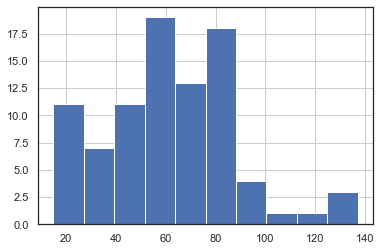

In [15]:
bi_genm_income = data[data['Gender'] == 'Male']
bi_genm_income['Annual Income (k$)'].hist()

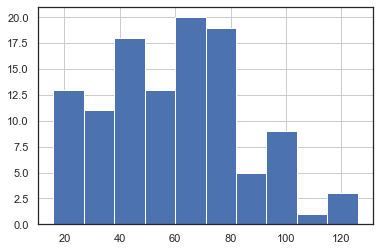

In [16]:
bi_genf_income = data[data['Gender'] == 'Female']
bi_genf_income['Annual Income (k$)'].hist()

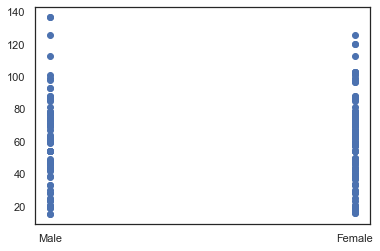

In [17]:
plt.scatter(data['Gender'],data['Annual Income (k$)'])

In [18]:
genm_spending = data[data['Gender'] == 'Male']['Spending Score (1-100)']
genm_spending.describe()

count     88.000000
mean      30.013295
std       24.329724
min        0.570000
25%       13.245000
50%       25.340000
75%       34.255000
max      113.710000
Name: Spending Score (1-100), dtype: float64

In [19]:
genf_spending = data[data['Gender'] == 'Female']['Spending Score (1-100)']
genf_spending.describe()

count    112.000000
mean      30.825179
std       21.839088
min        0.960000
25%       18.477500
50%       25.215000
75%       33.300000
max      102.830000
Name: Spending Score (1-100), dtype: float64

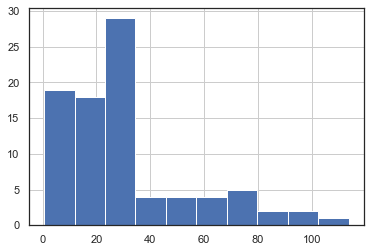

In [20]:
bi_genm_spending = data[data['Gender'] == 'Male']
bi_genm_spending['Spending Score (1-100)'].hist()

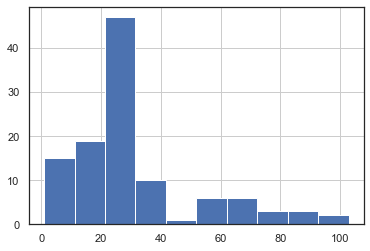

In [21]:
bi_genf_spending = data[data['Gender'] == 'Female']
bi_genf_spending['Spending Score (1-100)'].hist()

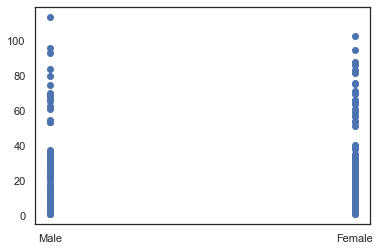

In [22]:
plt.scatter(data['Gender'],data['Spending Score (1-100)'])

In [23]:
#Description of the attributes:
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [24]:
data['Spending Score (1-100)'].describe()

count    200.000000
mean      30.467950
std       22.912533
min        0.570000
25%       16.550000
50%       25.265000
75%       34.040000
max      113.710000
Name: Spending Score (1-100), dtype: float64

In [25]:
data['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [26]:
corr = data.corr()
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.573197
Age,-0.026763,1.000000,-0.012398,-0.196914
Annual Income (k$),0.977548,-0.012398,1.000000,0.583315
Spending Score (1-100),0.573197,-0.196914,0.583315,1.000000


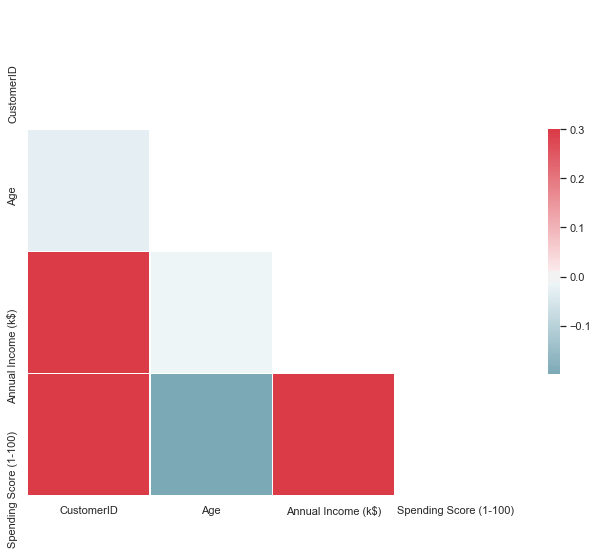

In [27]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

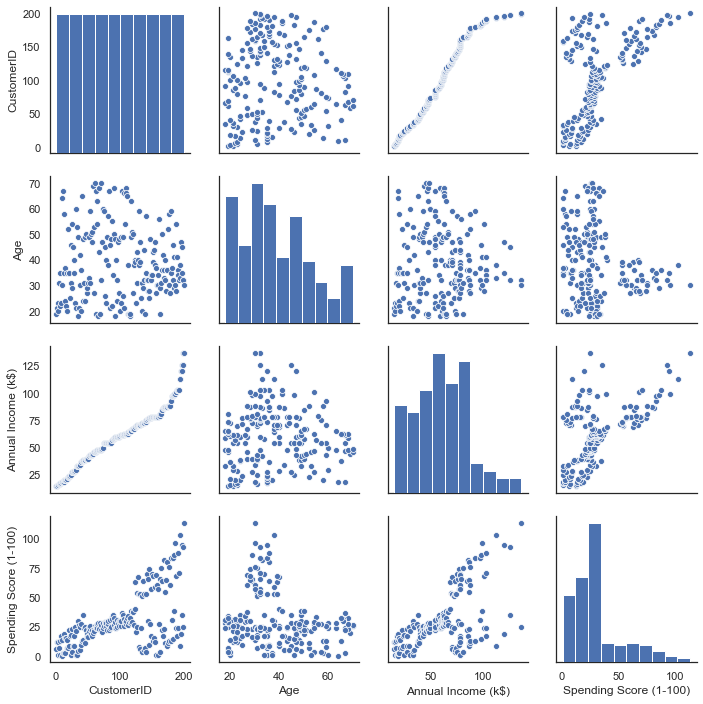

In [28]:
sns.pairplot(data)

In [29]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

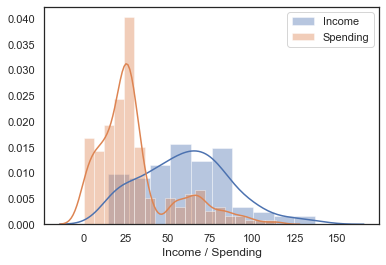

In [30]:
plot_income = sns.distplot(data["Annual Income (k$)"],label="Income")
plot_spend = sns.distplot(data["Spending Score (1-100)"],label="Spending")
plt.xlabel('Income / Spending')
plt.legend()

In [31]:
data["Gender"] = data["Gender"].map({"Male": 0, "Female": 1})

In [32]:
X=data.iloc[:,3:5].values

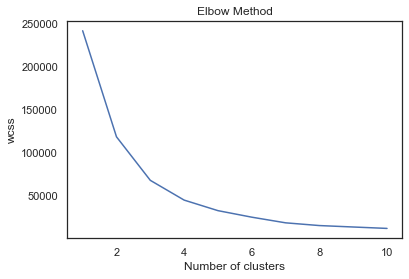

In [33]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [34]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.5275695683388869
For n_clusters=3, The Silhouette Coefficient is 0.46450925485729294
For n_clusters=4, The Silhouette Coefficient is 0.5073965327080855
For n_clusters=5, The Silhouette Coefficient is 0.5108433751522532
For n_clusters=6, The Silhouette Coefficient is 0.5090679248337608
For n_clusters=7, The Silhouette Coefficient is 0.5019642919492796
For n_clusters=8, The Silhouette Coefficient is 0.5037561200335188
For n_clusters=9, The Silhouette Coefficient is 0.4509697190539106
For n_clusters=10, The Silhouette Coefficient is 0.47168180609293253


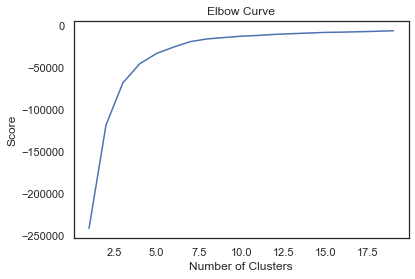

[-241749.12865949998, -118546.33461206137, -68002.97308593948, -45048.795232798715, -32800.94865684141, -25200.861563078055, -18676.403618097327, -15448.493353756447, -13805.854548905925, -12196.648230101751, -11294.391013348464, -10035.809329761349, -9210.481588291068, -8421.164342158581, -7677.634917459731, -7346.145593506044, -6889.37224277749, -6342.9918356717335, -5707.713618399174]


In [35]:
import pylab as pl
from sklearn.decomposition import PCA

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

print(score)

In [36]:
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(X)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()

k: 1  cost: 241749.1286595
k: 2  cost: 118546.33461206142
k: 3  cost: 68002.9730859395
k: 4  cost: 45048.79523279881
k: 5  cost: 32800.94865684143
k: 6  cost: 25212.198929477498
k: 7  cost: 18648.065338839533
k: 8  cost: 15476.822723500001
k: 9  cost: 13823.133203094869
k: 10  cost: 12759.326691666041



In [37]:
km4=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

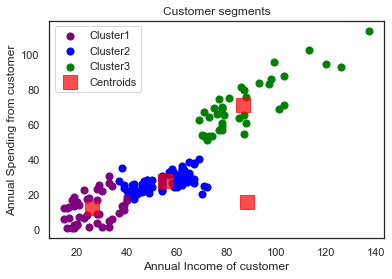

In [40]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
#plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual Income of customer')
plt.ylabel('Annual Spending from customer')
plt.legend()
plt.show()